## In this notebook we take all the tweeter users who teewted with #joebiden during US 2020 election and plot their follwers count to see if it obeys the Benford's law or not

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


def firstDigit(number):
    if number == 0:
        return 0
    else:
        digits = (int)(math.log10(number)) 
        number = (int)(number / pow(10, digits)) 
        return number
    
    
def graph(data,col_name):
    col = data
    length = len(col)
    
    dict_freq = {}
    for i in range(1,10):
        dict_freq[str(i)] = 0
    for i in col:
        if (type(i) is int or type(i) is float) and i>0:
            f_digit = firstDigit(i)
            dict_freq[str(f_digit)]+=1

    benford_dict = {}
    for i in range(1,10):
        benford_dict[str(i)] = math.log10(1+1/i)
    freq_ben = np.array(list(benford_dict.values()))
    total_entries = 0
    for i in list(dict_freq.values()):
        total_entries+=i
        
        
    digits = list(dict_freq.keys())
    frequency = list(dict_freq.values())
    benford_freq = freq_ben * total_entries

    fig = plt.figure(figsize = (10, 8))
    plt.bar(range(len(dict_freq)),frequency,tick_label=digits,color = 'orange')
    plt.plot(digits,frequency,label=f"Realtime-{col_name} Metric Analysis",color='black',linestyle='dashed',linewidth=3,marker='o')
    plt.plot(digits,benford_freq,label="Actual Benford's Analysis",color='blue',linestyle='dashed',linewidth=3,marker='*')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig(f'result_{col_name}.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(dict_freq)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


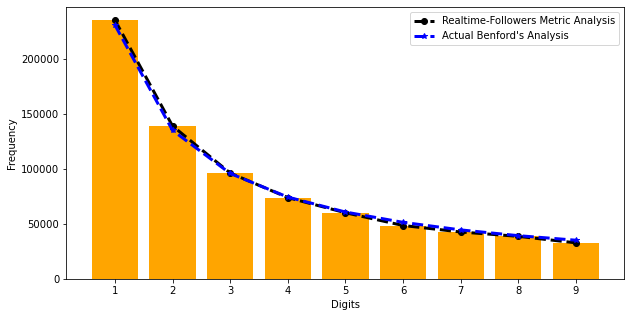

{'1': 235013, '2': 138760, '3': 96024, '4': 73730, '5': 59971, '6': 48387, '7': 42502, '8': 38533, '9': 32644}


In [24]:
hashtag_joebiden = np.asarray(pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv")['user_followers_count'])
# the data contains mixed data type , converting to int

for i in range(0,len(hashtag_joebiden)):
    try:
        hashtag_joebiden[i] = int(float(hashtag_joebiden[i]))
    except:
        pass
    
graph(hashtag_joebiden,'Followers')

## Conclusion: It almost perfectly obeys the law